In [1]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1)

import keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [4]:
train = pd.read_csv("fashion-mnist_train_small.csv")
test = pd.read_csv("fashion-mnist_test_small.csv")

In [6]:
train_np = train.as_matrix()
train_y = train_np[:,0]
train_x = train_np[:, 1:]

(12000, 784)


In [30]:
test_np = test.as_matrix()
test_y = test_np[:, 0]
test_x = test_np[:, 1:]

In [31]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

In [32]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [33]:
model = Sequential()
 
model.add(Convolution2D(12, (3, 3), activation='sigmoid', kernel_initializer='glorot_uniform', use_bias=True,
                        kernel_regularizer=keras.regularizers.l2(0.001), data_format='channels_last', input_shape=(28,28,1)))
model.add(Convolution2D(10, (3, 3), activation='relu', kernel_initializer='glorot_uniform', use_bias=True,
                        kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform', use_bias=True, 
                kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dense(10, activation='sigmoid'))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [35]:
history = model.fit(train_x, train_y, batch_size=40, epochs=13, verbose=1)

Epoch 1/13
12000/12000 [==============================] - 26s - loss: 0.7266 - acc: 0.7731    
Epoch 2/13
12000/12000 [==============================] - 21s - loss: 0.4895 - acc: 0.8565    
Epoch 3/13
12000/12000 [==============================] - 22s - loss: 0.4385 - acc: 0.8742    - ETA: 0s - loss: 0.4390 - acc
Epoch 4/13
12000/12000 [==============================] - 23s - loss: 0.4095 - acc: 0.8823    
Epoch 5/13
12000/12000 [==============================] - 22s - loss: 0.3857 - acc: 0.8917    
Epoch 6/13
12000/12000 [==============================] - 23s - loss: 0.3686 - acc: 0.8996    
Epoch 7/13
12000/12000 [==============================] - 22s - loss: 0.3547 - acc: 0.9017    
Epoch 8/13
12000/12000 [==============================] - 22s - loss: 0.3414 - acc: 0.9085    
Epoch 9/13
12000/12000 [==============================] - 22s - loss: 0.3321 - acc: 0.9128    
Epoch 10/13
12000/12000 [==============================] - 22s - loss: 0.3226 - acc: 0.9160    
Epoch 11/13
12000/1

In [36]:
score = model.evaluate(test_x, test_y, verbose=0)
score1 = model.evaluate(train_x, train_y, verbose=0)
print (score)
print(score1)

[0.38858131488164266, 0.88933333349227905]
[0.29070351751645407, 0.92874999999999996]


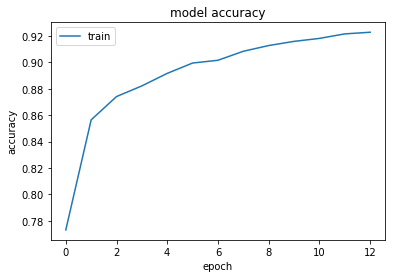

In [40]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [41]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [1]:
import numpy as np
import pandas as pd
import keras

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.utils import to_categorical
from keras.models import model_from_json
def predictForNewData(file_name="fashion-mnist_test_small.csv"):
    new_data = pd.read_csv(file_name)
    new_data_np = new_data.as_matrix()
    new_data_y = new_data_np[:, 0]
    new_data_x = new_data_np[:, 1:]
    
    new_data_x = new_data_x.reshape(new_data_x.shape[0], 28, 28, 1)
    new_data_y = to_categorical(new_data_y)
    
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    
    loaded_model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    score = loaded_model.evaluate(new_data_x, new_data_y, verbose=0)
    print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))  

Using TensorFlow backend.


In [2]:
predictForNewData()

acc: 88.93%
